I am using bio-yeast-protein-inter network  
https://networkrepository.com/bio-yeast-protein-inter.php

In [36]:


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# Load network from file

In [37]:
import networkx as nx

# Load edge list with weights
G = nx.read_edgelist("/content/bio-yeast-protein-inter.edges", nodetype=int, data=(("weight", float),))


# a. Plot Degree Distribution (N(k) vs k)

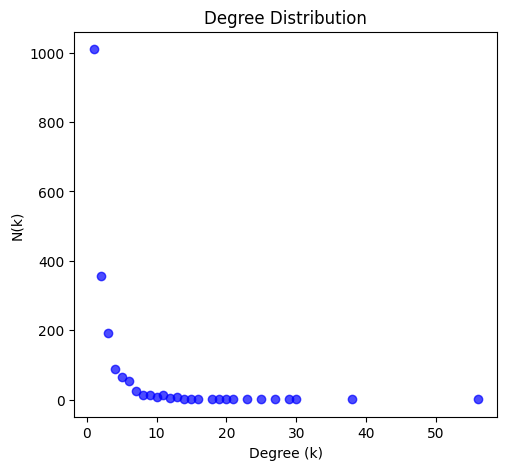

In [38]:

# Compute degree distribution
degree_sequence = [d for n, d in G.degree()]
degree_count = np.bincount(degree_sequence)  # Counts occurrences of each degree
k_values = np.nonzero(degree_count)[0]  # Nonzero degree values
N_k = degree_count[k_values]  # Frequency of each degree

#Plot Degree Distribution (N(k) vs k)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(k_values, N_k, color="blue", alpha=0.7)
plt.xlabel("Degree (k)")
plt.ylabel("N(k)")
plt.title("Degree Distribution")
plt.xscale("linear")
plt.yscale("linear")

# b.Plot the log (N(k)) vs log(k)

Text(0.5, 1.0, 'Log-Log Degree Distribution')

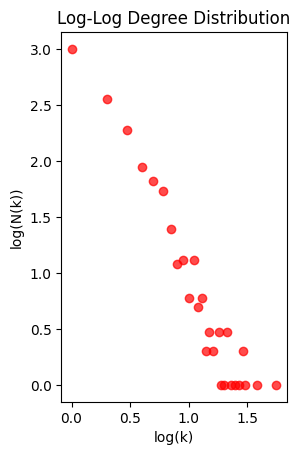

In [39]:
#Log-Log plot of Degree Distribution
log_k = np.log10(k_values)
log_N_k = np.log10(N_k)

plt.subplot(1, 2, 2)
plt.scatter(log_k, log_N_k, color="red", alpha=0.7)
plt.xlabel("log(k)")
plt.ylabel("log(N(k))")
plt.title("Log-Log Degree Distribution")

# Compute the spearman correlation coefficient.

In [40]:
# Compute Spearman correlation coefficient
spearman_corr, _ = stats.spearmanr(log_k, log_N_k)
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")


Spearman Correlation Coefficient: -0.9440


# c.Plot the chosen network with node size proportional to its betweenness centrality.


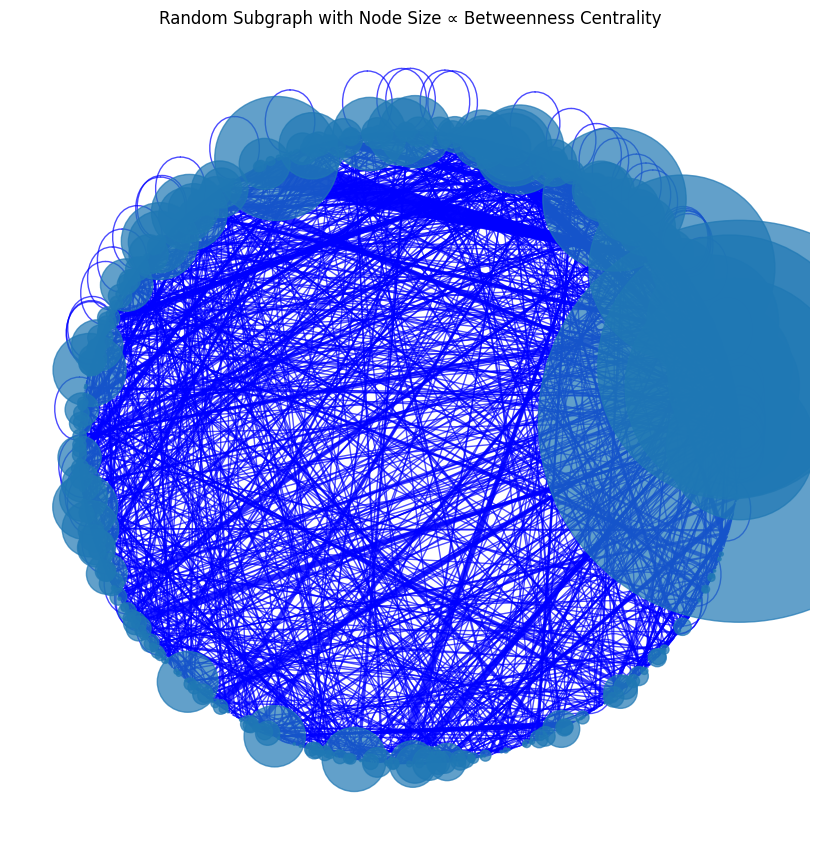

In [44]:
import random

# Compute betweenness centrality for the subgraph
betweenness = nx.betweenness_centrality(G,)
node_size = [int(5000000 * (betweenness[n]**2)) for n in G.nodes()]  # Scale node size by betweenness
# Extract node sizes from betweenness centrality
node_sizes = [betweenness.get(node, 0) * 10000000 for node in G.nodes()]
node_sizes = [int(i)for i in node_sizes ]
# Visualize the subgraph
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)   # Layout for subgraph
nx.draw(G, pos, with_labels=False, node_size=node_size, edge_color="blue", alpha=0.7)
plt.title("Random Subgraph with Node Size ∝ Betweenness Centrality")
plt.show()
